In [15]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("./capturetcp_c_pcap.csv", sep='@')
cond_s = df['ip.src'] == '192.168.1.78'
df_s = df[cond_s]
cond_c = df['ip.src'] == '192.168.1.79'
df_c  = df[cond_c]

cond_ack = ~df_s['tcp.analysis.acks_frame'].isna()
df_s_ack = df_s[cond_ack]
df_s_ack

,frame.number,frame.time,ip.src,ip.dst,_ws.col.Protocol,frame.len,tcp.analysis.acks_frame,tcp.seq_raw,tcp.len,tcp.analysis.ack_rtt,tcp.srcport,tcp.dstport,tcp.analysis.bytes_in_flight,tcp.analysis.retransmission,tcp.analysis.fast_retransmission,tcp.analysis.out_of_order
1,2,"Nov 13, 2023 16:04:50.656790000 CST",192.168.1.78,192.168.1.79,TCP,74,1.0,704944570,0,0.012468,5050,57406,NaN,NaN,NaN,NaN
4,5,"Nov 13, 2023 16:04:50.661307000 CST",192.168.1.78,192.168.1.79,TCP,66,4.0,704944571,0,0.004288,5050,57406,NaN,NaN,NaN,NaN
7,8,"Nov 13, 2023 16:04:51.377360000 CST",192.168.1.78,192.168.1.79,TCP,66,6.0,704944571,0,0.215111,5050,57406,NaN,NaN,NaN,NaN
10,11,"Nov 13, 2023 16:04:51.738759000 CST",192.168.1.78,192.168.1.79,TCP,66,10.0,704944571,0,0.071264,5050,57406,NaN,NaN,NaN,NaN
12,13,"Nov 13, 2023 16:04:52.192475000 CST",192.168.1.78,192.168.1.79,TCP,66,12.0,704944571,0,0.019751,5050,57406,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,256,"Nov 13, 2023 16:05:49.347208000 CST",192.168.1.78,192.168.1.79,TCP,66,254.0,704944571,0,0.679246,5050,57406,NaN,NaN,NaN,NaN
258,259,"Nov 13, 2023 16:05:49.434547000 CST",192.168.1.78,192.168.1.79,TCP,66,258.0,704944571,0,0.087219,5050,57406,NaN,NaN,NaN,NaN
260,261,"Nov 13, 2023 16:05:49.762489000 CST",192.168.1.78,192.168.1.79,TCP,66,260.0,704944571,0,0.089019,5050,57406,NaN,NaN,NaN,NaN
262,263,"Nov 13, 2023 16:05:50.252946000 CST",192.168.1.78,192.168.1.79,TCP,66,262.0,704944571,0,0.074202,5050,57406,NaN,NaN,NaN,NaN


## Calculate Round-Trip-Time

using the calculated RTT provided by Wireshark.

In [17]:
rtt_list = []
for i in range(len(df_s_ack)-1):
    rtt_list.append(df_s_ack['tcp.analysis.ack_rtt'].iloc[i])

rtt_list

[0.012468,
 0.004288,
 0.215111,
 0.071264,
 0.019751,
 0.031615,
 0.037116,
 0.003615,
 0.004172,
 0.536956,
 0.066278,
 0.076836,
 0.100679,
 0.087403,
 0.063594,
 0.10449,
 0.114415,
 0.019441,
 0.437844,
 0.166818,
 0.183031,
 0.20477,
 0.057149,
 0.112799,
 0.003898,
 0.282871,
 0.085318,
 0.094065,
 0.101648,
 0.110474,
 0.009976,
 0.024552,
 0.036573,
 0.003832,
 0.051563,
 0.077273,
 0.268567,
 0.090569,
 0.023195,
 0.293281,
 0.099696,
 0.105078,
 0.317441,
 0.221275,
 0.404129,
 0.350746,
 0.182462,
 0.048296,
 0.382515,
 0.060269,
 0.273313,
 0.091242,
 0.169544,
 0.092284,
 0.099727,
 0.105348,
 0.013918,
 0.020015,
 0.041821,
 0.058076,
 0.055991,
 0.046611,
 0.685976,
 0.084161,
 0.013659,
 0.080703,
 0.08571,
 0.117491,
 0.10246,
 0.107964,
 0.130514,
 0.151255,
 0.170969,
 0.060173,
 0.041595,
 0.095724,
 0.077533,
 0.13688,
 0.071322,
 0.077501,
 0.085105,
 0.093501,
 0.10073,
 0.106249,
 0.031218,
 0.02263,
 0.02852,
 0.020851,
 0.042149,
 0.052376,
 0.058887,
 0.0655

In [18]:
# 單位是 ms
stdev = statistics.stdev(rtt_list)
mean = statistics.mean(rtt_list)
median = statistics.median(rtt_list)
print("standard deviation:", stdev)
print("mean:", mean)
print("median:", median)

standard deviation: 0.12600206607872544
mean: 0.11864770833333334
median: 0.0852115


In [19]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)

0.04787475 0.11803125 0.07015650000000001 -0.057360000000000015 0.22326600000000002


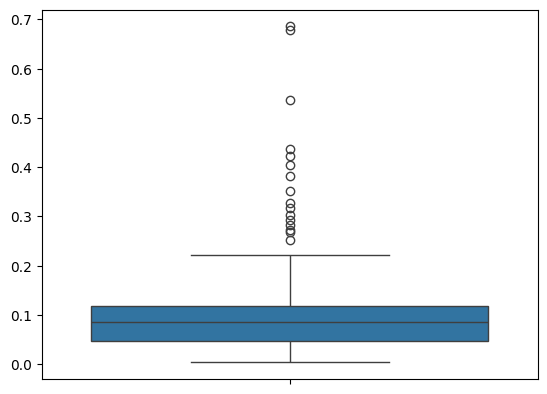

In [21]:
sns.boxplot(rtt_list)
plt.show()

## Re-Transmission